In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155455 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm 
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

NanumGothic Eco


# 뉴스 전처리

데이터 설명
- AI Hub에서 제공하는 문서요약텍스트 데이터 중 신문기사 train_original.json파일을 사용. 
- https://aihub.or.kr/aidata/8054
- AI가 텍스트를 이해하고 핵심내용을 자동으로 요약하는 기술개발을 위한 텍스트 및 요약내용을 생성하는 텍스트 데이터로, 그 중에서 신문기사 원문데이터를 사용하여 문서요약과 토픽모델링을 진행. 
  - media: 미디어 명
  - id : 문서 번호
  - article_original : 신문기사
  - abstractive : AI hub에서 제공하는 생성 요약문
  - extractive : 추출요약문, 원문의 형태적 구조를 바탕으로 내용을 잘 표현하는 문장 3개를 우선순위에 따라 차례로 작성


In [ ]:
# from google.colab import files
# data = files.upload()

In [ ]:
!gdown https://drive.google.com/uc?id=1KuBG40WNpVPV1ilfGaiCI2D3l8JVSfbS

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1KuBG40WNpVPV1ilfGaiCI2D3l8JVSfbS 



In [ ]:
import pandas as pd

df_news = pd.read_json("./train_original.json")
df_news

In [ ]:
# 원문기사 
df_news['article_original'].iloc[0]

In [ ]:
# 생성 요약문(AI hub)
df_news['abstractive'].iloc[0]

"통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 관련 통계를 작성한 이래 가장 많았으며 사망 원인 중 폐렴과 알츠하이머 병의 순위 상승이 두드러졌고 자살에 의한 사망자도 증가했다. "

In [ ]:
# 주요 문장 추출 결과(AI hub)
for i in df_news['extractive'].iloc[0]:
  print(df_news['article_original'].iloc[0][i])

24일 통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 전년 대비 4.7%(1만 3286명) 증가한 29만 8820명으로 관련 통계를 작성한 1983년 이후 가장 많았으며, 5년 연속 증가세를 보였다.
특히 폐렴(4위→3위)과 치매의 일종인 알츠하이머병(11위→9위)에 의한 사망률 순위 상승이 두드러졌다.
지난해 자살에 의한 사망자는 1만 3670명으로 전년보다 9.7%(1207명) 증가했다.


In [ ]:
# 데이터 타입과 null 값 확인
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260697 entries, 0 to 260696
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   media             260697 non-null  object
 1   id                260697 non-null  int64 
 2   article_original  260697 non-null  object
 3   abstractive       260697 non-null  object
 4   extractive        260697 non-null  object
dtypes: int64(1), object(4)
memory usage: 9.9+ MB


# 문서 요약: 키워드 추출 및 핵심 문장 선택

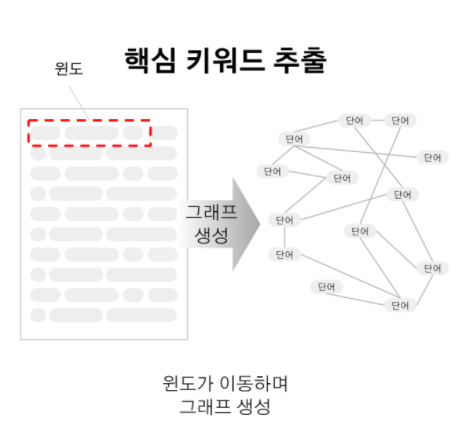

In [ ]:
# 뉴스 데이터 프레임에서 본문 하나를 가져옴
doc = ' '.join(df_news['article_original'].iloc[0])
doc

'지난해 고령화와 유례가 드문 겨울 한파 등 영향으로 우리나라 사망자 수가 통계 작성 이후 가장 많았다. 폐렴과 치매의 일종인 알츠하이머병은 지난해 사망원인 순위 3위와 9위로 전년보다 각각 한 단계, 두 단계 상승하는 등 노인성 질병에 의한 사망률이 급증하는 추세다. ‘연령표준화 사망률’(표준인구 10만 명당 사망자 수)은 울산·충북·부산 순으로 높게 나타났다. ■작년 사망자 29만 8820명, 역대 최다 24일 통계청이 발표한 \'2018년 사망원인통계\'를 보면 지난해 총 사망자 수는 전년 대비 4.7%(1만 3286명) 증가한 29만 8820명으로 관련 통계를 작성한 1983년 이후 가장 많았으며, 5년 연속 증가세를 보였다. 통계청은 인구 구조의 고령화와 지난해 1~2월 유례가 드문 한파 등을 그 원인으로 꼽았다. 지난해 조사망률(인구 10만 명당 사망자 수) 역시 582.5명으로 전년보다 4.5%(25.1명) 증가해 5년 연속 늘었다. 특히 80세 이상의 사망자가 전체 사망자의 절반에 가까운 46.3%로, 10년 전보다 14.3%포인트(P)나 증가했다. ■폐렴·알츠하이머병 사망률 순위 ‘껑충’ 사망원인별로 보면 지난해 암(악성신생물)에 의한 사망률(이하 인구 10만 명당 사망자 수)은 154.3명으로 전년보다 0.2% 증가했다. 1983년 관련 통계를 집계한 이래 줄곧 암이 사망원인 1위로 집계됐다. 특히 폐렴(4위→3위)과 치매의 일종인 알츠하이머병(11위→9위)에 의한 사망률 순위 상승이 두드러졌다. 폐렴 사망률은 2004년 10위에서 꾸준히 순위가 상승하고 있고, 알츠하이머병 사망률 역시 통계 작성 이래 10대 사인에 처음 포함됐다. 지난해 알츠하이머병에 의한 사망률은 12.0명으로 전년(9.8명) 대비 22.5% 증가했다. 알츠하이머병 사망률은 10년 전(3.8명)과 비교하면 무려 214.2% 증가했다. 폐렴 사망률은 45.4명으로 전년(37.8명) 대비 20.0% 증가했다. 알코올 관련 사망률은 9.6명으로 전년보다 2.0% 늘었다. ■자살

In [ ]:
from gensim.summarization import keywords

print(keywords(doc, words=5).split('\n'))

['지난해', '자살이', '연령표준화', '사망률', '증가했다']


In [ ]:
# 상위 10% 키워드 추출
print(keywords(doc, ratio=0.1).split('\n'))

['지난해 고령화와', '자살이', '연령표준화', '사망률', '증가했다', '알츠하이머병', '절반에']


In [ ]:
# 5개의 키워드와 각 단어의 중요도 출력
print(keywords(doc, words=10, scores=True))

[('지난해 고령화와', 0.26532508873358507), ('자살이', 0.19852191643852043), ('연령표준화', 0.1739523227547708), ('사망률', 0.17275916836369154), ('증가했다', 0.16537350036346893), ('알츠하이머병', 0.16031396345425258), ('절반에', 0.1495951010383252), ('우리나라', 0.14959510103832513), ('통계를', 0.14959510103832496)]


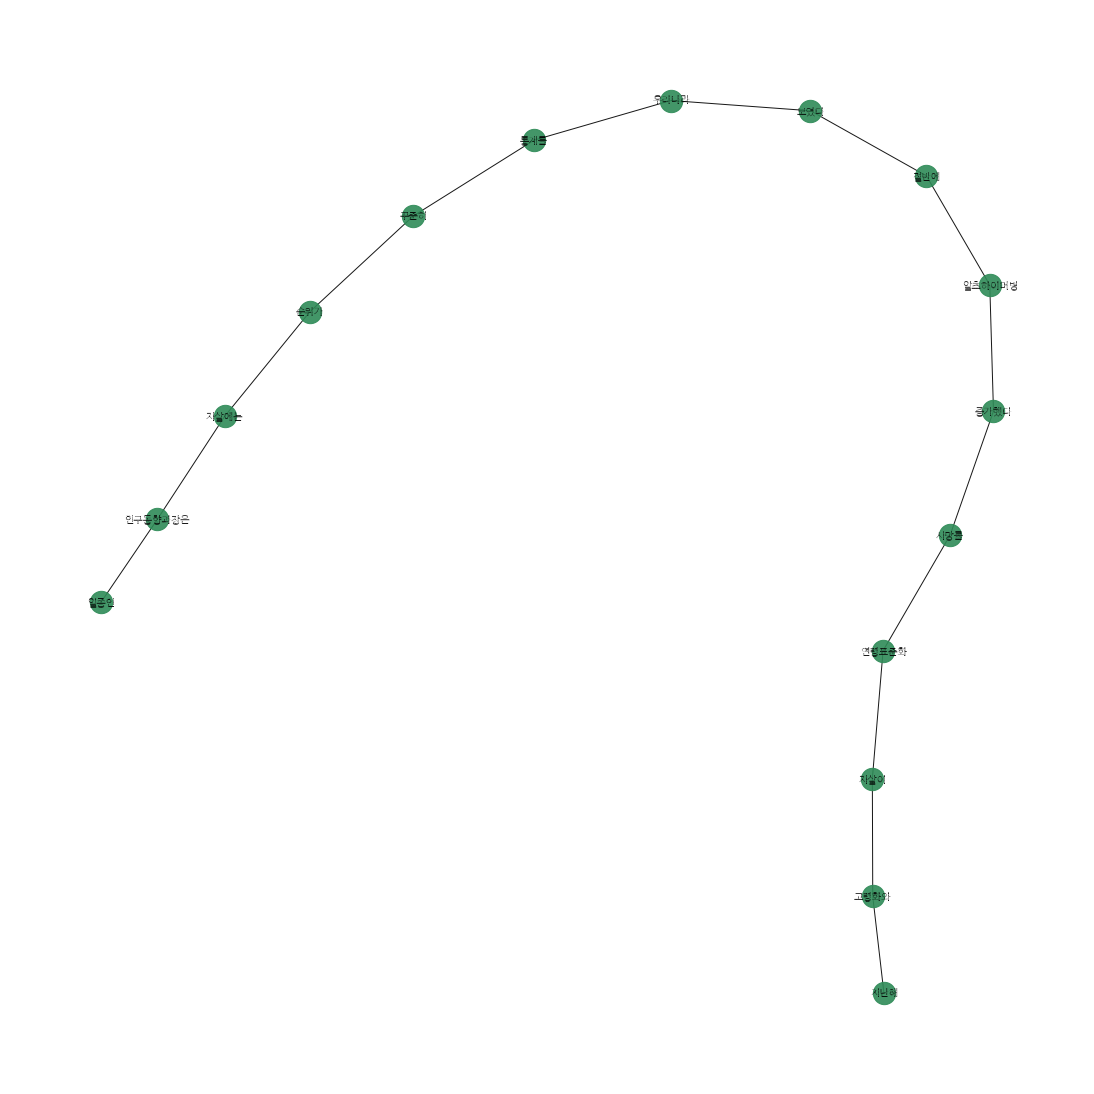

In [ ]:
from gensim.summarization.keywords import get_graph
import networkx as nx
import matplotlib.pyplot as plt

def displayGraph(textGraph):

    graph = nx.Graph()
    for edge in textGraph.edges():
        graph.add_node(edge[0])
        graph.add_node(edge[1])
        graph.add_weighted_edges_from([(edge[0], edge[1], textGraph.edge_weight(edge))])

        textGraph.edge_weight(edge)
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(15, 15))
    nx.draw(graph, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in graph.nodes()}, font_family=font_name,font_size=10)
    plt.axis('off')
    plt.show()

text = keywords(doc)
displayGraph(get_graph(text))

In [ ]:
from gensim.summarization.summarizer import summarize

summarize(doc).split('\n')

['폐렴과 치매의 일종인 알츠하이머병은 지난해 사망원인 순위 3위와 9위로 전년보다 각각 한 단계, 두 단계 상승하는 등 노인성 질병에 의한 사망률이 급증하는 추세다.',
 '지난해 조사망률(인구 10만 명당 사망자 수) 역시 582.5명으로 전년보다 4.5%(25.1명) 증가해 5년 연속 늘었다.',
 '■폐렴·알츠하이머병 사망률 순위 ‘껑충’ 사망원인별로 보면 지난해 암(악성신생물)에 의한 사망률(이하 인구 10만 명당 사망자 수)은 154.3명으로 전년보다 0.2% 증가했다.',
 '자살률은 26.6명으로 전년보다 2.3명(9.5%) 증가했다.']

In [ ]:
# 중요도 상위 10% 문장
summarize(doc, ratio = 0.1)

'폐렴과 치매의 일종인 알츠하이머병은 지난해 사망원인 순위 3위와 9위로 전년보다 각각 한 단계, 두 단계 상승하는 등 노인성 질병에 의한 사망률이 급증하는 추세다.\n■폐렴·알츠하이머병 사망률 순위 ‘껑충’ 사망원인별로 보면 지난해 암(악성신생물)에 의한 사망률(이하 인구 10만 명당 사망자 수)은 154.3명으로 전년보다 0.2% 증가했다.'

In [ ]:
# 단어 개수로 설정
summarize(doc, word_count = 20)

'■폐렴·알츠하이머병 사망률 순위 ‘껑충’ 사망원인별로 보면 지난해 암(악성신생물)에 의한 사망률(이하 인구 10만 명당 사망자 수)은 154.3명으로 전년보다 0.2% 증가했다.'

In [ ]:
# 단어 개수로 설정
summarize(doc, word_count = 50)

'폐렴과 치매의 일종인 알츠하이머병은 지난해 사망원인 순위 3위와 9위로 전년보다 각각 한 단계, 두 단계 상승하는 등 노인성 질병에 의한 사망률이 급증하는 추세다.\n■폐렴·알츠하이머병 사망률 순위 ‘껑충’ 사망원인별로 보면 지난해 암(악성신생물)에 의한 사망률(이하 인구 10만 명당 사망자 수)은 154.3명으로 전년보다 0.2% 증가했다.\n자살률은 26.6명으로 전년보다 2.3명(9.5%) 증가했다.'

In [ ]:
# AIHub에서 생성한 요약문과 비교하여 보면, 
print('AI Hub에서 제공하는 사람이 생성한 요약문 :\n',df_news['abstractive'].iloc[0])
print('\n-------------\n')
print('텍스트 랭크 모델을 사용한 요약문 :\n',summarize(doc, word_count = 50))

AI Hub에서 제공하는 사람이 생성한 요약문 :
 통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 관련 통계를 작성한 이래 가장 많았으며 사망 원인 중 폐렴과 알츠하이머 병의 순위 상승이 두드러졌고 자살에 의한 사망자도 증가했다. 

-------------

텍스트 랭크 모델을 사용한 요약문 :
 폐렴과 치매의 일종인 알츠하이머병은 지난해 사망원인 순위 3위와 9위로 전년보다 각각 한 단계, 두 단계 상승하는 등 노인성 질병에 의한 사망률이 급증하는 추세다.
■폐렴·알츠하이머병 사망률 순위 ‘껑충’ 사망원인별로 보면 지난해 암(악성신생물)에 의한 사망률(이하 인구 10만 명당 사망자 수)은 154.3명으로 전년보다 0.2% 증가했다.
자살률은 26.6명으로 전년보다 2.3명(9.5%) 증가했다.


핵심 정보인 
- 사망 원인 중 폐렴과 알츠하이머 병의 순위상승
- 자살로 인한 사망자 증가
가 두 요약문 모두에 포함되어 있는 것을 확인할 수 있다